In [69]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

with MPRester("5TRoGi3ks3zfqgmPsey1") as m:
    structure = m.get_structure_by_material_id("mp-754883")
    w = CifWriter(structure)
    w.write_file('mystructure.cif')

In [70]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import matplotlib.pyplot as plt

Lors de l'émission de rayons X sur un cristal, on peut observer des phénomènes de diffraction, qui peuvent être représentés sous la forme d'un diffractogramme. Le diffractogramme obtenu résulte des nombreux phénomènes d'interférences suite à la diffraction du rayon incident par les atomes du cristal. Les interférences entre ondes diffractées peuvent être destructives ou constructives en fonction de la direction. Déterminons ici les 3 premiers pics du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα de longueur d'onde λ=1.54060 Å. 

Sur base des données fournies par le CIF de materialsproject, nous pouvons identifier les 3 premiers pics.

In [71]:
#Création d'un objet et calcul du "diffraction pattern"
obj = XRDCalculator()
objp = d.get_pattern(structure, scaled=True, two_theta_range=(0, 90))

**Graphique reprenant les 3 premiers pics du diffractogramme**

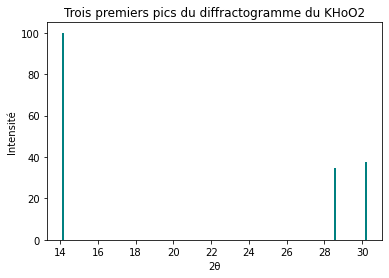

In [72]:
printmd('**Graphique reprenant les 3 premiers pics du diffractogramme**')

plt.title('Trois premiers pics du diffractogramme du KHoO2')
plt.xlabel('2\u03B8')
plt.ylabel('Intensité')
plt.bar([(objp.x)[0],(objp.x)[1],(objp.x[2])], [(objp.y)[0],(objp.y)[1],(objp.y[2])], 0.1, color='teal')
plt.show()


Nous allons maintenant, pour chacun des trois premiers pics du diffractogramme, déterminer la distance d_hkl (la distance inter-réticulaire, c'est-à-dire la distance entre deux plans réticulaires adjacents d'une même famille dans le réseau direct), les indices de Miller (h, k, l) associés au pic, l'intensité du pic ainsi que l'angle 2θ (calculé selon la loi de Bragg).

In [73]:
printmd('**Analyse du premier pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**')

print('Distance inter-planaire d_hkl =', (objp.d_hkls)[0]) 
print('Indices (h,k,l) associés:', (objp.hkls)[0])
print('Angle 2\u03B8\u00b0 =', (objp.x)[0])
print('Intensité =', (objp.y)[0])

**Analyse du premier pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**

Distance inter-planaire d_hkl = 6.254550069999999
Indices (h,k,l) associés: [{'hkl': (1, 1, 1), 'multiplicity': 2}]
Angle 2θ° = 14.160275650010048
Intensité = 100.0


In [74]:
printmd('**Analyse du second pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**')

print('Distance inter-planaire d_hkl =', (objp.d_hkls)[1]) 
print('Indices (h,k,l) associés:', (objp.hkls)[1])
print('Angle 2\u03B8\u00b0 =', (objp.x)[1])
print('Intensité =', (objp.y)[1])

**Analyse du second pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**

Distance inter-planaire d_hkl = 3.1272750349999994
Indices (h,k,l) associés: [{'hkl': (2, 2, 2), 'multiplicity': 2}]
Angle 2θ° = 28.54275865424583
Intensité = 34.85624341883719


In [75]:
printmd('**Analyse du troisième pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**')

print('Distance inter-planaire d_hkl =', (objp.d_hkls)[2]) 
print('Indices (h,k,l) associés:', (objp.hkls)[2])
print('Angle 2\u03B8\u00b0 =', (objp.x)[2])
print('Intensité =', (objp.y)[2])

**Analyse du troisième pic du diffractogramme du KHoO2 pour un rayonnement X incident Cu Kα:**

Distance inter-planaire d_hkl = 2.9599240617251934
Indices (h,k,l) associés: [{'hkl': (1, 0, 0), 'multiplicity': 6}]
Angle 2θ° = 30.193842329660235
Intensité = 37.56384456970538


**Diffratogramme complet du KHoO2 pour un rayonnement X incident Cu Kα**

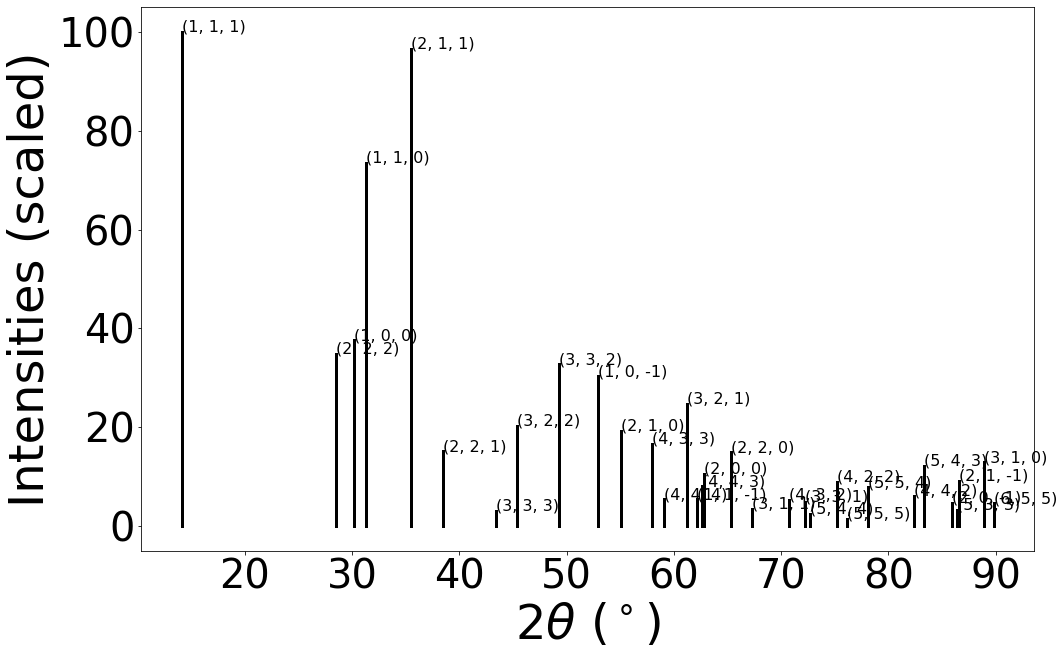

In [76]:
printmd('**Diffratogramme complet du KHoO2 pour un rayonnement X incident Cu Kα**')
obj.get_plot(structure)
plt.show()

In [77]:
printmd('**Diffractogramme du KHoO2 fourni par Materials Project**')

**Diffractogramme du KHoO2 fourni par Materials Project**

![](MPD.PNG)

Voici ci-dessus les 2 diffractogrammes complets du KHoO2. Le premier est celui calculé sur base du code et le second est directement fourni par Materials Project. En comparant les deux, nous pouvons remarquer que les intensités et angles 2θ sont les mêmes, mais on remarque une différence dans les indices (h, k, l) associés aux pics. Cela peut être expliqué par le fait que Materials Project calcule les indices pour le diffractogramme sur base de la maille conventionnelle, tandis que le code utilise la maille primitive. On peut également observer que les premiers pics sont les plus intenses.